In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**READ THE FILE**

In [2]:
data=pd.read_csv('/content/car_age_price.csv')

CHECK BASIC INFORMATION OF THE DATA

In [3]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
data.shape

(112, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [7]:
data.isnull().sum()

Year     0
Price    0
dtype: int64

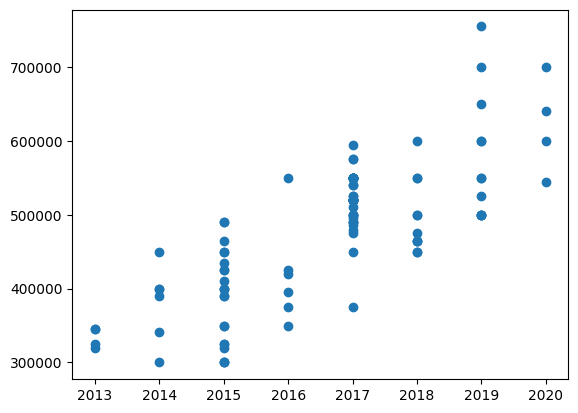

In [6]:
plt.scatter(data['Year'],data['Price'])

**LINEAR REGRESSION**

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score
from sklearn.model_selection import train_test_split

In [9]:
#X=data[['Year']]

y=data['Price']

In [10]:
X=data.drop(['Price'],axis=1)

TRAIN TEST SPLIT

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [12]:
lr = LinearRegression()
model = lr.fit(X_train,y_train)

In [13]:
linear_pred = model.predict(X_test)

In [14]:
print('R-squared_error is ', r2_score(y_test,linear_pred))


R-squared_error is  0.4347961632108023


In [15]:

print('mean_squared_error is ', mean_squared_error(y_test,linear_pred))

mean_squared_error is  3878767151.073449


In [16]:
type(y_test)

pandas.core.series.Series

**LASSO REGRESSION**

In [17]:
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=1)

In [18]:
model_lasso.fit(X_train,y_train)
predict_lasso = model_lasso.predict(X_test)

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
print('R2 score is:',r2_score(y_test,predict_lasso))

R2 score is: 0.4348007175862566


In [21]:
print('mean_squared_error is ', mean_squared_error(y_test,predict_lasso))

mean_squared_error is  3878735896.222091


# Which is better? There is very less difference between the r score values in Linear and Lasso, with Lasso performing slightly better.

**POSSIBLE PRICE OF 2022 CAR**

In [22]:
data1 = dict(Year = 2022)
df1 = pd.DataFrame(data1, index=[0])
df1

,Year
0,2022


In [23]:
linear = model.predict(df1)

In [24]:
linear

array([740160.11937766])

In [25]:
lasso =  model_lasso.predict(df1)

In [26]:
lasso

array([740157.95700142])

# The Price of a 2022 second hand Grand i10 is estimated at 740157 using Lasso Regression